In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

# dataset configuration

In [2]:
#X = np.load('./dataset/X.npy')
#Y = np.load('./dataset/Y.npy')
#Y = keras.utils.to_categorical(Y)

# shuffle the data
#perm = np.random.permutation(Y.shape[0])
#X = X[perm]
#Y = Y[perm]

#print(X.shape, Y.shape)

In [3]:
# train test split (Don't touch the test data until done with training)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
#print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
#np.save('./dataset/X_train.npy', X_train)
#np.save('./dataset/X_test.npy', X_test)
#np.save('./dataset/Y_train.npy', Y_train)
#np.save('./dataset/Y_test.npy', Y_test)

## dataset has been settled ⬆️, no need to do it again

# build the model

In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),      # 8 x 8 x 32
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'),     # 6 x 6 x 64
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
adam = keras.optimizers.Adam(lr=0.001)
sgd = keras.optimizers.SGD(lr=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# training (save the pretrained model to ./model/cnn_model.h5)
(Don't touch the test data until done with training!)

In [6]:
# load training data
X_train = np.load('./dataset/X_train.npy')
Y_train = np.load('./dataset/Y_train.npy')

# load testing data
X_test = np.load('./dataset/X_test.npy')
Y_test = np.load('./dataset/Y_test.npy')

In [7]:
# reset learning rate
keras.backend.set_value(model.optimizer.lr, 0.0001)
print(f'Learning rate: {keras.backend.get_value(model.optimizer.lr):.4f}')

Learning rate: 0.0001


In [8]:
# training for _ epochs
epochs = 0
model.fit(X_train, Y_train, batch_size=1024, epochs=epochs)

In [9]:
###model.save('./model/cnn_model.h5')

# Analysis (load the pretrained model from disk)
## Model Configuration:
I used a very simple 3 layer CNN, the final accuracy on the untouched test set is 0.86, which is quite decent. The training accuracy is even a little bit lower than the test accuracy, so I guess there is no overfitting problem, which is a good news. The Dropout layer has done a good job.

In [10]:
# load pretrained model
model = keras.models.load_model('./model/cnn_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 32)          5632      
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2305      
Total params: 26,433
Trainable params: 26,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
# load the test dataset
_, test_accuracy = model.evaluate(X_test, Y_test, batch_size=64)
print(f'Test accuracy: {test_accuracy}')

41882/41882 [==============================] - 3s 82us/step
Test accuracy: 0.8645480158426809


In [12]:
predictions = model.predict(X_test) 
diff = np.abs(Y_test - predictions)
for i in np.linspace(0, 0.9, 10):
    print(f'The percentage of examples that have |Y_true - Y_pred| > {i:.1f} is: {np.sum(diff > i) / Y_test.shape[0]:.2f}%')

The percentage of examples that have |Y_true - Y_pred| > 0.0 is: 1.00%
The percentage of examples that have |Y_true - Y_pred| > 0.1 is: 0.44%
The percentage of examples that have |Y_true - Y_pred| > 0.2 is: 0.34%
The percentage of examples that have |Y_true - Y_pred| > 0.3 is: 0.27%
The percentage of examples that have |Y_true - Y_pred| > 0.4 is: 0.21%
The percentage of examples that have |Y_true - Y_pred| > 0.5 is: 0.14%
The percentage of examples that have |Y_true - Y_pred| > 0.6 is: 0.08%
The percentage of examples that have |Y_true - Y_pred| > 0.7 is: 0.04%
The percentage of examples that have |Y_true - Y_pred| > 0.8 is: 0.02%
The percentage of examples that have |Y_true - Y_pred| > 0.9 is: 0.01%


# Let's see on which examples does our classifier perform the worst
### Turned out that as a noob, I can't predict the result of the examples that the classifier predicted wrong either.

In [13]:
import chess
def print_true_pred(idx):
    Y_true = 'White wins' if Y_test[idx].item() == 0 else 'White loses'
    Y_pred = 'White wins' if predictions[idx].item() < 0.5 else 'White loses'
    print(f'Y_true: {Y_true}\nY_pred: {Y_pred}')

In [14]:
worst_perform_examples_indices = np.where(diff > 0.996)[0]
worst_perform_examples_indices

array([10359, 10564, 31624, 40141, 40910])

Y_true: White loses
Y_pred: White wins


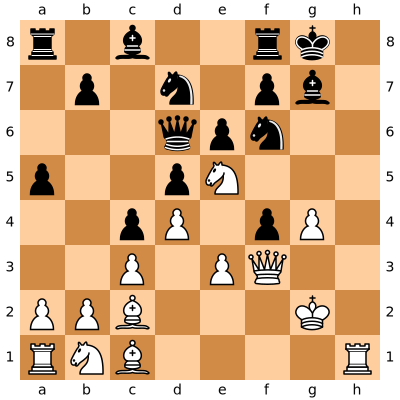

In [15]:
# white to move
print_true_pred(10359)
board_10359 = chess.Board('r1b2rk1/1p1n1pb1/3qpn2/p2pN3/2pP1pP1/2P1PQ2/PPB3K1/RNB4R w - - 0 1')
board_10359

Y_true: White loses
Y_pred: White wins


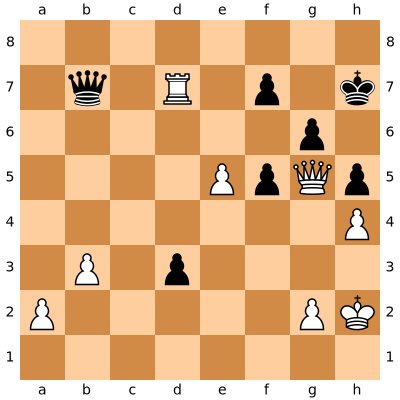

In [16]:
# black to move
print_true_pred(10564)
board_10564 = chess.Board('8/1q1R1p1k/6p1/4PpQp/7P/1P1p4/P5PK/8 b - - 0 1')
board_10564

Y_true: White wins
Y_pred: White loses


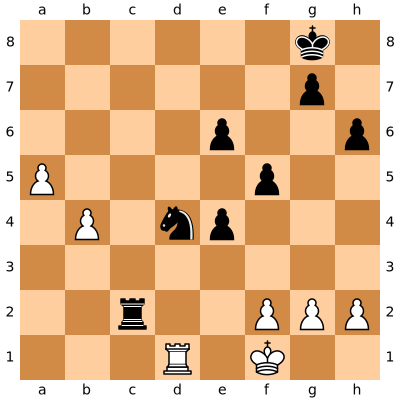

In [17]:
# white to 
print_true_pred(31624)
board_31624 = chess.Board('6k1/6p1/4p2p/P4p2/1P1np3/8/2r2PPP/3R1K2 w - - 0 1')
board_31624

# Let's see on which examples does our classifier perform the best

In [18]:
worst_perform_examples_indices = np.where(diff < 1e-10)[0]
worst_perform_examples_indices

array([  803,  1039,  1448,  2540,  4536,  6691,  7118,  7574,  9112,
        9777,  9874, 10121, 11344, 11551, 11723, 11901, 12610, 12759,
       18999, 20476, 21002, 22103, 22170, 22649, 25717, 25952, 26302,
       26393, 28216, 28258, 29400, 29941, 30185, 31639, 32206, 32901,
       35584, 36574, 37319, 40062, 40712, 41701])

Y_true: White loses
Y_pred: White loses


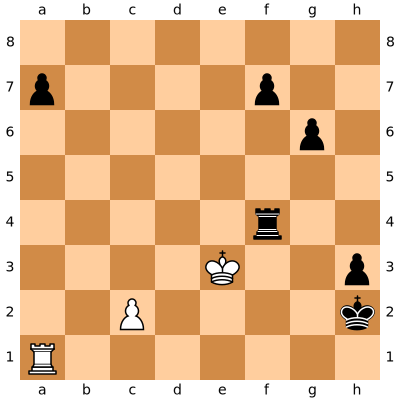

In [19]:
# black to move
print_true_pred(803)
board_803 = chess.Board('8/p4p2/6p1/8/5r2/4K2p/2P4k/R7 w - - 0 1')
board_803

### The example shown below is quite obvious even though I am a noob. White is totally screwed up.

Y_true: White loses
Y_pred: White loses


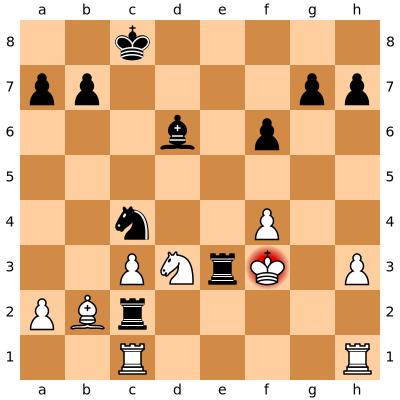

In [20]:
# white to move
print_true_pred(1039)
board_1039 = chess.Board('2k5/pp4pp/3b1p2/8/2n2P2/2PNrK1P/PBr5/2R4R w - - 0 1')
board_1039

### The one shown below is quite obvious too. The black will move the bishop to g2, and the white is dead.

Y_true: White loses
Y_pred: White loses


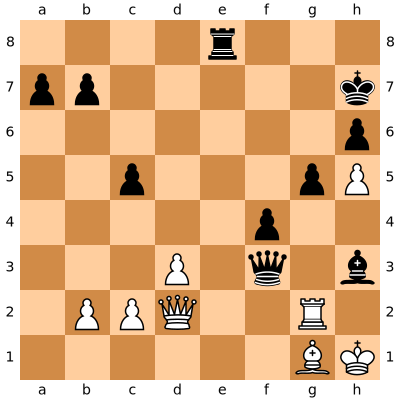

In [21]:
# black to move
print_true_pred(1448)
board_1448 = chess.Board('4r3/pp5k/7p/2p3pP/5p2/3P1q1b/1PPQ2R1/6BK w - - 0 1')
board_1448